### Datasets Review ORA Finance

Enter Project Cover (with names and ID):

To do List:
<br> Create Mathematical Notation for our Models
<br> Describe in more detail each outcome (additional visualizations)
<br> Extract core visualizations, findings and interpretations for presentation
<br> Think of video setup / animations / presentation style

Enter Project Description; Mention the following:
<br>a) Scope and Objective
<br>b) Reasoning Behind Stock Picking
<br>c) Steps which we will undertake (ex. import data from yfinance, model of estimating risk etc.)

In [15]:
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
import pyfolio as pf
from pylab import mpl, plt
import pandas as pd
import pandas as pd
import numpy as np
from math import sqrt
from gurobipy import *
import scipy.optimize as sco


In [16]:
import yfinance as yf

stocks = ['BTC-USD', 'ADA-USD', 'ETH-USD', 'DOGE-USD', 'BRK-A', 'AAPL', 'MSFT', 'JPM', 'GOOG', 'BAC', 'INTC', 'WFC',
          'C', 'VZ', 'FB', 'PFE', 'JNJ', 'WMT', 'XOM',
          'FNMA', 'T', 'UNH', 'CMCSA']

data = pd.DataFrame(yf.download(stocks, period='1y', adjusted = True))
#data=data.Close
#data = data[stocks]
#data = data.dropna()
#print(data)

[*********************100%***********************]  23 of 23 completed


In [17]:
#Evaluating the 1/n portfolio
n_assets = len(stocks)
returns = data['Adj Close'].pct_change().dropna()
portfolio_weights = n_assets * [1 / n_assets]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
 index=returns.index)

Start date,2020-10-15
End date,2021-10-14
Total months,17
,Backtest
Annual return,88.5%
Cumulative returns,150.4%
Annual volatility,21.4%
Sharpe ratio,3.07
Calmar ratio,6.81
Stability,0.85
Max drawdown,-13.0%


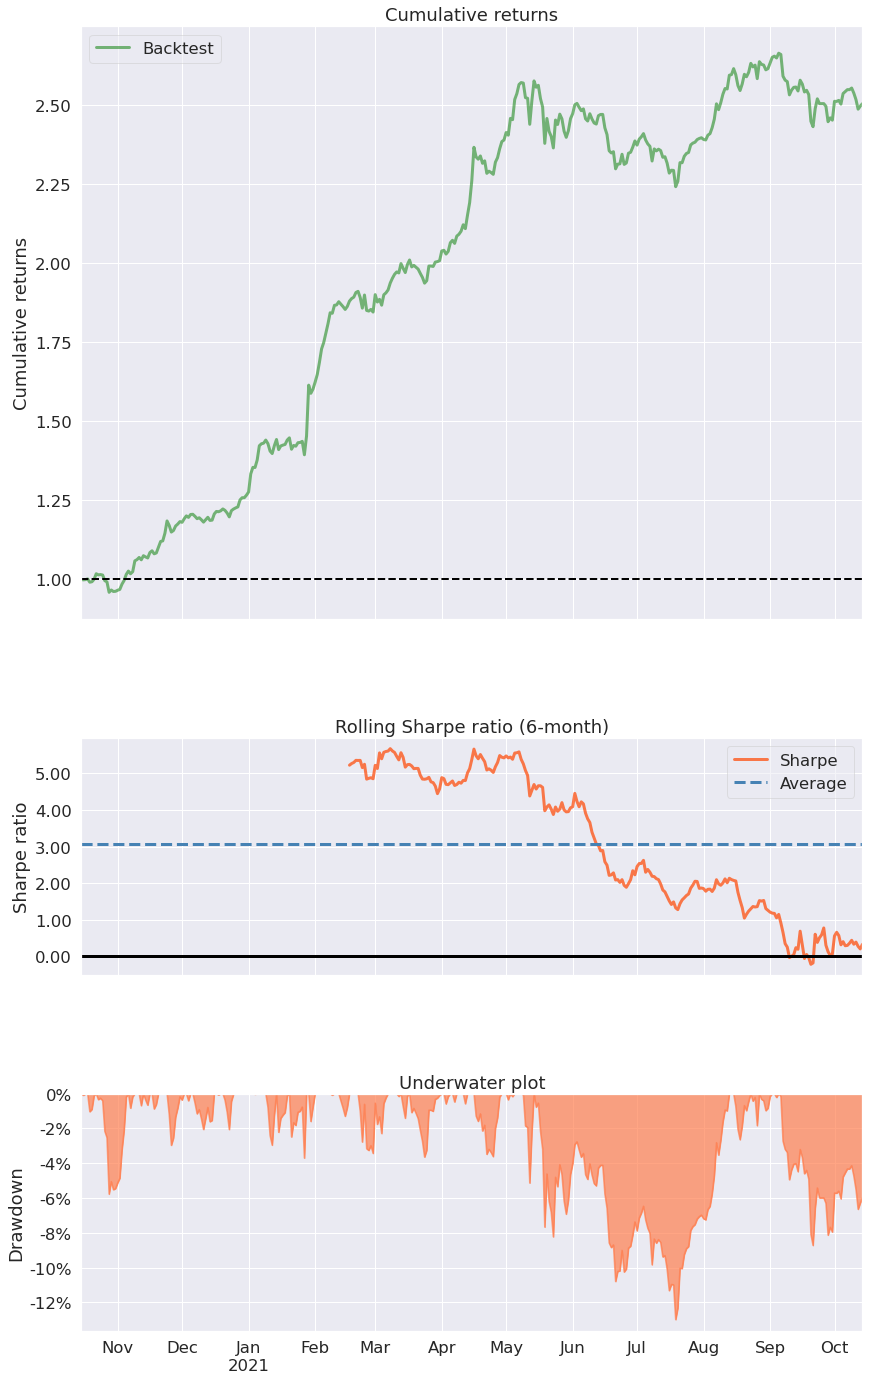

In [18]:
#Could interpret all of the given in LaTeX Notation
pf.create_simple_tear_sheet(portfolio_returns)

In [19]:
#Finding the Efficient Frontier using Monte Carlo simulations
#We build thousands of portfolios, using randomly assigned weights, and visualize the results

In [20]:
#Set nr of portfolios and days we generate for the simulation
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252

In [21]:
#Calculate annualized average returns and the corresponding standard deviation:
returns_df = data['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [22]:
#Simulate random portfolio weights
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [23]:
#Calculate the portfolio metrics:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [24]:
#Create a DataFrame containing all the data:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
 'volatility': portf_vol,
 'sharpe_ratio':
 portf_sharpe_ratio})

In [25]:
#Locate the points creating the Efficient Frontier:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

#Append each index point within range
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
        matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
        portf_vol_ef.append(np.min(portf_vol[matched_ind]))
        portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

ValueError: x and y must have same first dimension, but have shapes (0,) and (100,)

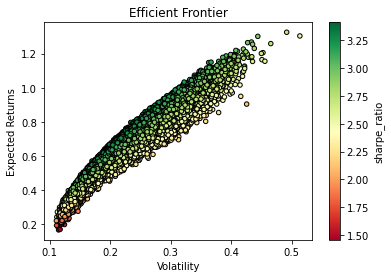

In [49]:
#Plot Efficient Frontier
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', 
                      x='volatility', 
                      y='returns', 
                      c='sharpe_ratio',
                      cmap='RdYlGn',
                      edgecolors='black',
                      ax=ax)

ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')

#Plot some symbols comparably
#Fix Dimension Error
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), y=avg_returns[asset_index], marker=data[asset_index], s=150, color='black', label=data[asset_index])
    ax.legend()


In [27]:
#Find which one has the highest Sharpe
#AKA tangency value - highest risk per highest return
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]


In [28]:
#Find the components of the portfolio containing them
print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
    print('\nWeights')

for x, y in zip(data, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)


Maximum Sharpe ratio portfolio ----
Performance
returns: 79.70% 
Weights
volatility: 23.38% 
Weights
sharpe_ratio: 340.90% 
Weights
('Adj Close', 'AAPL'): 1.70% ('Adj Close', 'ADA-USD'): 10.21% ('Adj Close', 'BAC'): 9.83% ('Adj Close', 'BRK-A'): 10.31% ('Adj Close', 'BTC-USD'): 0.97% ('Adj Close', 'C'): 2.88% ('Adj Close', 'CMCSA'): 2.08% ('Adj Close', 'DOGE-USD'): 3.12% ('Adj Close', 'ETH-USD'): 3.21% ('Adj Close', 'FB'): 10.56% ('Adj Close', 'FNMA'): 0.15% ('Adj Close', 'GOOG'): 4.85% ('Adj Close', 'INTC'): 2.21% ('Adj Close', 'JNJ'): 1.04% ('Adj Close', 'JPM'): 10.83% ('Adj Close', 'MSFT'): 2.15% ('Adj Close', 'PFE'): 0.86% ('Adj Close', 'T'): 0.59% ('Adj Close', 'UNH'): 1.22% ('Adj Close', 'VZ'): 0.78% ('Adj Close', 'WFC'): 9.45% ('Adj Close', 'WMT'): 1.03% ('Adj Close', 'XOM'): 9.96% 

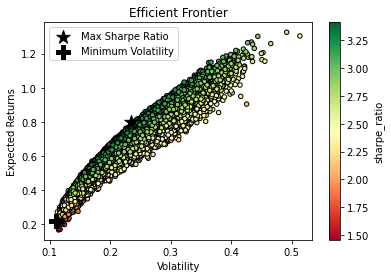

In [29]:
#Visualize the Tangency Portfolio
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, y=max_sharpe_portf.returns, c='black', marker='*', s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, y=min_vol_portf.returns, c='black', marker='P', s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.legend()


In [30]:
#Now instead of brute force - we use optimization of our portfolio through scipy
#First, we define functions for calculating portfolio returns and volatility:

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [31]:
#Define the function calculating the Efficient Frontier:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    efficient_portfolios = []
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    for ret in rtns_range:
        constraints = ({'type': 'eq',
                        'fun': lambda x: get_portf_rtn(x, avg_rtns)- ret},
                       {'type': 'eq','fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol,
                                           initial_guess,
                                           args=args,
                                           method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    return efficient_portfolios


In [32]:
#Define the bounds of returns
rtns_range = np.linspace(-0.22, 0.32, 200)

In [33]:
#Calculate Efficient Frontier
efficient_portfolios = get_efficient_frontier(avg_returns,
                                              cov_mat,
                                              rtns_range)


In [34]:
#Extract the volatilities of the efficient portfolios
vols_range = [x['fun'] for x in efficient_portfolios]

[Text(0.5, 0, 'Volatility'),
 Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 1.0, 'Efficient Frontier')]

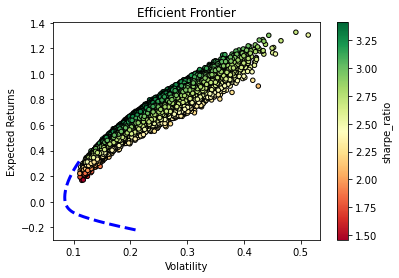

In [35]:
#Plot the calculated Efficient Frontier, together with the simulated portfolios:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')


In [36]:
#Identify the minimum volatility portfolio:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']
min_vol_portf = {'Return': min_vol_portf_rtn, 'Volatility': min_vol_portf_vol, 'Sharpe Ratio': (min_vol_portf_rtn / min_vol_portf_vol)}


In [37]:
#Print the performance summary:
print('Minimum volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
    print('\nWeights')
    
for x, y in zip(stocks, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum volatility portfolio ----
Performance
Return: 3.24% 
Weights
Volatility: 8.43% 
Weights
Sharpe Ratio: 38.39% 
Weights
BTC-USD: 1.42% ADA-USD: 0.00% ETH-USD: 0.54% DOGE-USD: 0.00% BRK-A: 0.00% AAPL: 0.00% MSFT: 0.00% JPM: 0.31% GOOG: 0.00% BAC: 0.57% INTC: 3.06% WFC: 0.00% C: 2.90% VZ: 14.53% FB: 0.21% PFE: 10.79% JNJ: 2.99% WMT: 4.26% XOM: 2.46% FNMA: 37.13% T: 0.00% UNH: 18.83% CMCSA: 0.00% 

In [38]:
#We can also use the optimization approach to find the weights that generate a portfolio with the highest expected Sharpe ratio
#First, we define the objective function (negative Sharpe ratio)

def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

In [39]:
#Find the optimized portfolio:
n_assets = len(avg_returns)
RF_RATE = 0
args = (avg_returns, cov_mat, RF_RATE)
constraints = ({'type': 'eq','fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]
max_sharpe_portf = sco.minimize(neg_sharpe_ratio,
 x0=initial_guess,
 args=args,
 method='SLSQP',
 bounds=bounds,
 constraints=constraints)


In [40]:
#Extract information about the maximum Sharpe ratio portfolio:
max_sharpe_portf_w = max_sharpe_portf['x']
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, avg_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w,
                                                avg_returns,
                                                cov_mat),
 'Sharpe Ratio': -max_sharpe_portf['fun']}


In [41]:
#Print Performance Summary
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
    print('\nWeights')

for x, y in zip(stocks, max_sharpe_portf_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 76.56% 
Weights
Volatility: 20.90% 
Weights
Sharpe Ratio: 366.30% 
Weights
BTC-USD: 0.00% ADA-USD: 7.10% ETH-USD: 28.49% DOGE-USD: 0.00% BRK-A: 0.00% AAPL: 0.00% MSFT: 0.00% JPM: 2.71% GOOG: 4.54% BAC: 0.00% INTC: 0.00% WFC: 29.62% C: 0.00% VZ: 0.00% FB: 0.00% PFE: 6.59% JNJ: 8.39% WMT: 0.00% XOM: 5.27% FNMA: 0.00% T: 7.29% UNH: 0.00% CMCSA: 0.00% 

In [48]:
#Could also use convex optimization if you guys want - but still same results

In [42]:
#Modify data to fit gurobi model
data=data.Close
data = data[stocks]
data = data.dropna()
print(data)

                 BTC-USD   ADA-USD      ETH-USD  DOGE-USD     BRK-A  \
Date                                                                  
2020-10-14  11429.506836  0.107297   379.484039  0.002637  316080.0   
2020-10-15  11495.349609  0.106635   377.441833  0.002593  317540.0   
2020-10-16  11322.123047  0.104064   366.229004  0.002612  318504.0   
2020-10-19  11742.037109  0.108677   379.935608  0.002590  313500.0   
2020-10-20  11916.334961  0.102494   369.136902  0.002601  315375.0   
...                  ...       ...          ...       ...       ...   
2021-10-07  53805.984375  2.276995  3587.974854  0.242923  425431.0   
2021-10-08  53967.847656  2.237176  3563.759277  0.243851  427765.0   
2021-10-11  57484.789062  2.173389  3545.354004  0.231503  423000.0   
2021-10-12  56041.058594  2.119190  3492.573242  0.226242  419596.0   
2021-10-13  57401.097656  2.189053  3606.201660  0.232572  418402.0   

                  AAPL        MSFT         JPM         GOOG        BAC  ... 

In [43]:
closes = np.transpose(np.array(data))       # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)

In [44]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-10-25
Using license file C:\Users\User\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 23 columns and 23 nonzeros
Model fingerprint: 0x74409d20
Model has 276 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e-07, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.05s
Presolved: 1 rows, 23 columns, 23 nonzeros
Presolved model has 276 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 22
 AA' NZ     : 2.530e+02
 Factor NZ  : 2.760e+02
 Factor Ops : 4.324e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Resi

In [45]:
import pandas as pd
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])

,Minimum Risk Portfolio
BTC-USD,1.289046e-05
ADA-USD,1.021272e-06
ETH-USD,6.392964e-07
DOGE-USD,3.128039e-03
BRK-A,1.982748e-04
AAPL,1.634710e-02
MSFT,1.113691e-01
JPM,1.614096e-02
GOOG,1.140784e-05
BAC,4.461418e-04


In [46]:
# Create an expression representing the expected return for the portfolio
portfolio_return = delta @ x
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 100):
    target[0].rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2 rows, 23 columns and 46 nonzeros
Model fingerprint: 0x1df610f6
Model has 276 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e-07, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 23 columns, 46 nonzeros
Presolved model has 276 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 22
 AA' NZ     : 2.760e+02
 Factor NZ  : 3.000e+02
 Factor Ops : 4.900e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.41630400e+05 -2.41630400e+05  2.23e+04 5.39e-03  1.00e+06     0s
   1   1.13676965e+04 -1.14732305e+04  1.63e+03 3.9

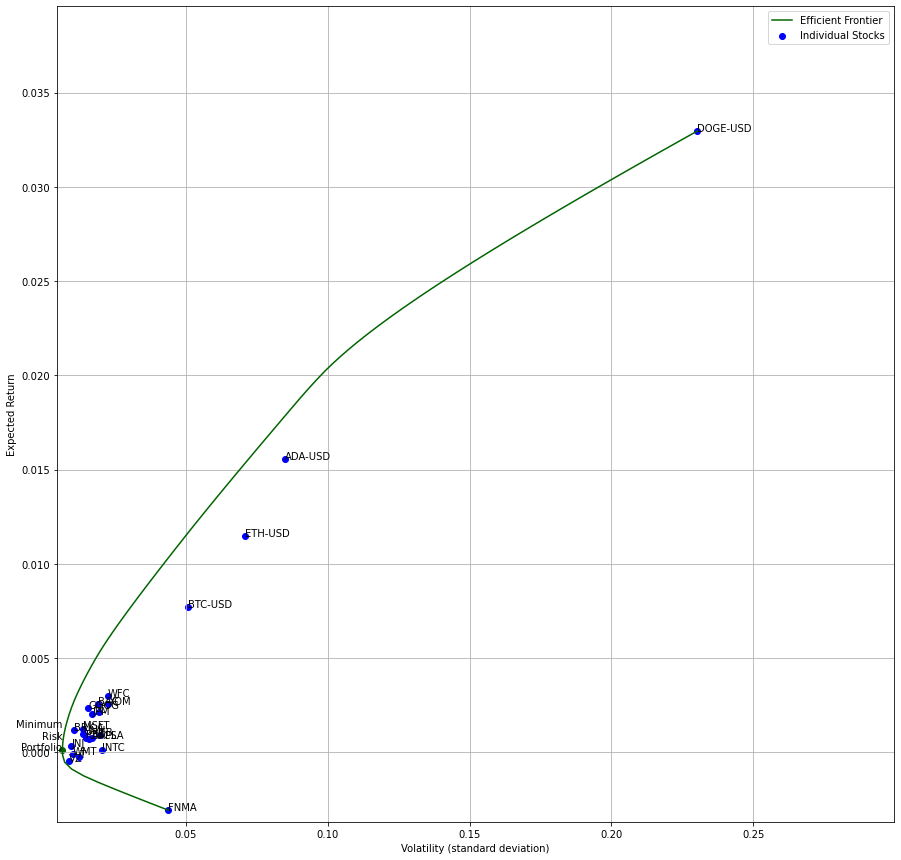

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.savefig('thegoldrush.png', dpi=100)
plt.show()